In [1]:
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
import csv

file = open('datasets/student_data_mat.csv')
csvreader = csv.reader(file, delimiter =';')
header = next(csvreader)
data = []

for row in csvreader:
  data.append(row)

X = []
Y = []


for i in range(len(data)):
    l: list = list(data[i])

    X.append(l[:-3])
    score = l[-1]

    numericScore = int(score)

    if(numericScore < 10):
      gradeRange = 0
    # elif(numericScore < 8):
    #   gradeRange = 1
    # elif(numericScore < 12):
    #   gradeRange = 2
    # elif(numericScore < 16):
    #   gradeRange = 3
    else:
      gradeRange = 1
      
    Y.append(gradeRange)

enc = OneHotEncoder(handle_unknown='ignore');
X = enc.fit_transform(X)

x_tr, x_te, y_tr, y_te = train_test_split(X, Y, test_size = 0.2, random_state=42, stratify=Y)

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

classifier = DecisionTreeClassifier()
param_grid = {'criterion': ['entropy', 'gini'],
              'max_depth': range(2,20,2),
              'min_samples_leaf': range(2,10,2),
              'min_impurity_decrease': np.linspace(0,0.5,10)}
gs = GridSearchCV(classifier, param_grid=param_grid)

# scaler = StandardScaler(with_mean=False).fit(x_tr)
# x_tr_scaled = scaler.transform(x_tr)

# gs.fit(x_tr, y_tr)
gs.fit(x_tr, y_tr)

# y_pred = gs.predict(scaler.transform(x_te))
y_pred = gs.predict(x_te)
accuracy_score(y_te, y_pred)


0.6708860759493671

In [60]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()

classifier.fit(x_tr, y_tr)

y_pred = classifier.predict(x_te)
accuracy_score(y_te, y_pred)

0.620253164556962

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

classifier = KNeighborsClassifier()

scaler = StandardScaler(with_mean=False).fit(x_tr)
x_tr_scaled = scaler.transform(x_tr)

classifier.fit(x_tr_scaled, y_tr)

y_pred = classifier.predict(scaler.transform(x_te))
accuracy_score(y_te, y_pred)

from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier()

classifier.fit(x_tr, y_tr)

y_pred = classifier.predict(x_te)
accuracy_score(y_te, y_pred)

/home/lvght/code/am-trab1/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.620253164556962

# Tentando com o cross validation

[START]  accuracy
[ 2 ] P:  0.6044303797468354  DP:  0.0031645569620253333
[ 3 ] P:  0.5696316262353998  DP:  0.038963750095243756
[ 4 ] P:  0.5664556962025316  DP:  0.05247824035372468
[ 5 ] P:  0.6109126984126985  DP:  0.08704960025763389
[ 6 ] P:  0.620585389453314  DP:  0.07344705379215058
[ 7 ] P:  0.6012422360248448  DP:  0.0395131259297897
[ 8 ] P:  0.5980769230769232  DP:  0.03682272464965878
[ 9 ] P:  0.62336860670194  DP:  0.07366773575806924
[ 10 ] P:  0.6110887096774195  DP:  0.07275516652433249
[ 11 ] P:  0.5985221674876847  DP:  0.08715808171293264
[ 12 ] P:  0.5858262108262108  DP:  0.10380489079733579
[ 13 ] P:  0.5856410256410256  DP:  0.10449826903555241
[ 14 ] P:  0.5539243365330321  DP:  0.12866340902016668
[END]  accuracy
[START]  precision_macro
[ 2 ] P:  0.5443497640899999  DP:  0.031151006326024744
[ 3 ] P:  0.5401824645975744  DP:  0.023618540195817227
[ 4 ] P:  0.5330947438462483  DP:  0.08586944706107126
[ 5 ] P:  0.5577761023794789  DP:  0.07623814582511804


Matplotlib is building the font cache; this may take a moment.


ValueError: x and y must have same first dimension, but have shapes (13,) and (14,)

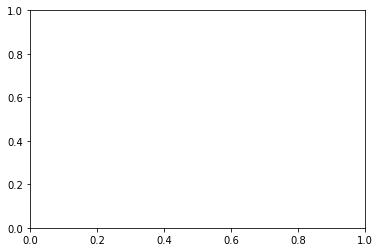

In [8]:
# import cross validation
from sklearn.model_selection import cross_val_score

# create scores array
scores = cross_val_score(classifier, x_tr, y_tr, cv=2)

# create an array of all possible scoring methods
scoring_methods = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'precision']

for scoring_method in scoring_methods:
    print("[START] ", scoring_method)
    for k in range(2, 15):
        scores = cross_val_score(classifier, x_tr, y_tr, cv=k, scoring=scoring_method)
        print("[", k, "]", "P: ", scores.mean(), " DP: ", scores.std())
    print("[END] ", scoring_method)

# for k in range(2, 15):
#     scores = cross_val_score(classifier, x_tr, y_tr, cv=k, scoring='precision')
#     print("[", k, "]", "P: ", scores.mean(), " DP: ", scores.std())

# print(scores)

# 10-fold CV teve o melhor resultado até o momento